In [38]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt



In [18]:
train_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/aclImdb/train'
folders = ['neg', 'pos']

train_data = []
train_labels = []

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            train_data.append(text)
            train_labels.append(0 if folder == 'neg' else 1)

print(len(train_data), len(train_labels))


25000 25000


In [17]:
for i in range(5):
    print("Review:", i+1)
    print(train_data[i])
    print("Label:", train_labels[i])  # Print corresponding label (0 for neg, 1 for pos)
    print("-------------------")

Review: 1
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
Label: 0
-------------------
Review: 2
Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through

In [19]:
test_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/aclImdb/test'
folders = ['neg', 'pos']

test_data = []
test_labels = []

for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            test_data.append(text)
            test_labels.append(0 if folder == 'neg' else 1)

print(len(test_data), len(test_labels))

25000 25000


In [21]:
unsup_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/aclImdb/train/unsup'

unsup_data = []

for filename in os.listdir(unsup_path):
    file_path = os.path.join(unsup_path, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        unsup_data.append(text)

print(len(unsup_data))

50000


## Preprocessing

In [23]:
#Text Preprocessing 

vectorizer = TfidfVectorizer(max_features = 5000)  
X = vectorizer.fit_transform(train_data)
y = train_labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Testing and Evaluation 

X_test = vectorizer.transform(test_data)

test_preds = nb_model.predict(X_test)

test_accuracy = accuracy_score(test_labels, test_preds)
print('Test Set Accuracy: ', test_accuracy)

Test Set Accuracy:  0.8406


In [35]:
# Text Cleaning and Tokenization 
# Lowercasing and removing punctuation

train_lower = [review.lower() for review in train_data]
train_cleaned = [review.translate(str.maketrans('', '', string.punctuation)) for review in train_lower]

tokenized_trained = [word_tokenize(review) for review in train_cleaned]

stop_words = set(stopwords.words('english'))

# Removes the common stopwords like 'a', 'about' 'are'
filtered_data = [[word for word in review if word not in stop_words] for review in tokenized_trained]

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

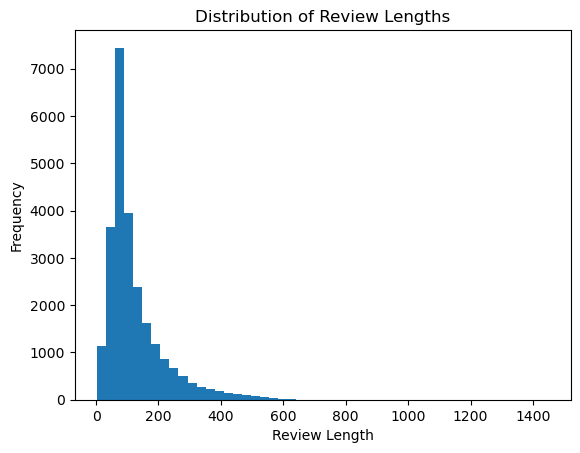

In [36]:
# Insights from initial EDA

review_lengths = [len(review) for review in filtered_data]
plt.hist(review_lengths, bins = 50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


In [37]:
# class distribution (Divided equally between positive and negatives)

pos_reviews = sum(label == 1 for label in train_labels)
neg_reviews = sum(label == 0 for label in train_labels)
print('Positive Reviews: ', pos_reviews)
print('Negative Reviews: ', neg_reviews)


Positive Reviews:  12500
Negative Reviews:  12500


In [39]:
# Feature Engineering 

bow_vectorizer = CountVectorizer(max_features = 5000)
bow_features = bow_vectorizer.fit_transform(train_data)

tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_features = tfidf_vectorizer.fit_transform(train_data)

print(tfidf_vectorizer)
print(tfidf_features)

TfidfVectorizer(max_features=5000)
  (0, 1809)	0.2154180451207366
  (0, 1948)	0.09210870815046932
  (0, 3118)	0.06907684364110198
  (0, 726)	0.14360608290300825
  (0, 4369)	0.22797392679128636
  (0, 4450)	0.08664999025268534
  (0, 233)	0.048772016621871
  (0, 3048)	0.2924129724625296
  (0, 4646)	0.1881709343134227
  (0, 1852)	0.08291109911696155
  (0, 4189)	0.27283452917182244
  (0, 576)	0.31527061005603163
  (0, 571)	0.1446463067366365
  (0, 360)	0.17122004800466642
  (0, 280)	0.27171939887106045
  (0, 4205)	0.12874991400841249
  (0, 4875)	0.2681138111368488
  (0, 4100)	0.27586362702665757
  (0, 2373)	0.05259220864003694
  (0, 428)	0.07404580181602996
  (0, 4516)	0.1504092750862989
  (0, 2734)	0.22885394886213406
  (0, 1727)	0.14941504488694773
  (0, 4464)	0.05184674741436131
  (0, 3933)	0.27858798501740445
  :	:
  (24999, 2230)	0.045807913925872905
  (24999, 2068)	0.038816068602694556
  (24999, 3851)	0.0814531140948919
  (24999, 3051)	0.03753132872100591
  (24999, 2059)	0.04731662799

In [40]:
# Training a Naive Bayes Classifier 

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

val_accuacy = nb_model.score(X_val, y_val)
print('Validation Set Accuracy (Naive Bayes): ', val_accuacy)

Validation Set Accuracy (Naive Bayes):  0.8502
